In [107]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Input
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [80]:
train_data_info = pd.read_csv("/workspaces/AITemplate/BrainTechAcademy/data_train/data_train_tutorial_four_classes.csv",
                            names=['data', 'label'])
test_data_info = pd.read_csv("/workspaces/AITemplate/BrainTechAcademy/data_test/data_test_tutorial_four_classes.csv",
                            names=['data', 'label'])

In [81]:
# Drop the data in test_data_info from train_data_info
for i in (test_data_info['data']):
    train_data_info = train_data_info[train_data_info['data'] != i]

train_data_info.reset_index(drop=True, inplace=True)

In [82]:
print(len(train_data_info))

72


In [83]:
print(type((train_data_info.label[19])))

<class 'str'>


In [118]:
#how to make an empty dataframe
X_train = pd.DataFrame(columns=['one', 'two', 'three'])
y_train = pd.DataFrame(columns=['label'])

for i in range (len(train_data_info)):
    train = pd.read_csv('/workspaces/AITemplate/BrainTechAcademy/data_train/{}'.format(train_data_info.data[i]),
                        names=['one', 'two', 'three'])    

    X_train = pd.concat([X_train, train], axis=0)
    test = {"label": train_data_info.label[i]}
    
    for t in range(len(train)):
        y_train = pd.concat([y_train, pd.DataFrame(test, index=[0])], ignore_index=True)

X_train.insert(3, "four", X_train['one'] + X_train['two'], True)
X_train.insert(4, "five", X_train['one'] + X_train['three'], True)
X_train.insert(5, "six", X_train['two'] + X_train['three'], True)
X_train.insert(6, "seven", X_train['one'] + X_train['two'] + X_train['three'], True)

/tmp/ipykernel_1691/1371109874.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  X_train = pd.concat([X_train, train], axis=0)


In [119]:
#how to make an empty dataframe
X_test = pd.DataFrame(columns=['one', 'two', 'three'])
y_test = pd.DataFrame(columns=['label'])

for i in range (1, len(test_data_info)):
    train = pd.read_csv('/workspaces/AITemplate/BrainTechAcademy/data_test/{}'.format(test_data_info.data[i]),
                        names=['one', 'two', 'three'])    

    X_test = pd.concat([X_test, train], axis=0)
    test = {"label": test_data_info.label[i]}
    
    for t in range(len(train)):
        y_test = pd.concat([y_test, pd.DataFrame(test, index=[0])], ignore_index=True)

X_test.insert(3, "four", X_test['one'] + X_test['two'], True)
X_test.insert(4, "five", X_test['one'] + X_test['three'], True)
X_test.insert(5, "six", X_test['two'] + X_test['three'], True)
X_test.insert(6, "seven", X_test['one'] + X_test['two'] + X_test['three'], True)

/tmp/ipykernel_1691/1449801745.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  X_test = pd.concat([X_test, train], axis=0)


In [120]:
X_train.shape

(43200, 7)

In [121]:
y_train.shape

(43200, 1)

In [122]:
X_test.shape

(14400, 7)

In [123]:
y_test.shape

(14400, 1)

In [124]:
X_train.describe()

,one,two,three,four,five,six,seven
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,0.002308,-0.004452,-0.015449,-0.002144,-0.013141,-0.019900,-0.017593
std,12.095940,9.365474,10.620233,19.149926,19.850927,19.009182,27.844474
min,-114.100527,-101.248228,-79.773434,-195.264789,-168.686411,-161.858891,-249.850673
25%,-5.828912,-4.960459,-5.592376,-10.038552,-10.234582,-10.180451,-14.576279
50%,-0.171645,-0.045377,0.042433,-0.127400,-0.067054,-0.061730,-0.108604
75%,5.358912,4.775819,5.588241,9.397816,9.807943,9.801141,13.980866
max,124.012562,107.653263,82.162260,188.625836,184.971251,167.979106,270.788096


In [125]:
#Implement sigmoid function to the columns
X_train['one'] = 1 / (1 + np.exp(-X_train['one']))
X_train['two'] = 1 / (1 + np.exp(-X_train['two']))
X_train['three'] = 1 / (1 + np.exp(-X_train['three']))
X_train['four'] = 1 / (1 + np.exp(-X_train['four']))
X_train['five'] = 1 / (1 + np.exp(-X_train['five']))
X_train['six'] = 1 / (1 + np.exp(-X_train['six']))
X_train['seven'] = 1 / (1 + np.exp(-X_train['seven']))

X_test['one'] = 1 / (1 + np.exp(-X_test['one']))
X_test['two'] = 1 / (1 + np.exp(-X_test['two']))
X_test['three'] = 1 / (1 + np.exp(-X_test['three']))
X_test['four'] = 1 / (1 + np.exp(-X_test['four']))
X_test['five'] = 1 / (1 + np.exp(-X_test['five']))
X_test['six'] = 1 / (1 + np.exp(-X_test['six']))
X_test['seven'] = 1 / (1 + np.exp(-X_test['seven']))

In [92]:
X_train.describe()

,one,two,three,four,five,six,seven
count,4.320000e+04,4.320000e+04,4.320000e+04,4.320000e+04,4.320000e+04,4.320000e+04,4.320000e+04
mean,4.915585e-01,4.963044e-01,5.005793e-01,4.962612e-01,4.981071e-01,4.991896e-01,4.983141e-01
std,4.477936e-01,4.418904e-01,4.497078e-01,4.701510e-01,4.716533e-01,4.714401e-01,4.802372e-01
min,2.797505e-50,1.067710e-44,2.263800e-35,1.576085e-85,5.500758e-74,5.076647e-71,3.099069e-109
25%,2.932649e-03,6.960913e-03,3.712333e-03,4.368106e-05,3.590558e-05,3.790267e-05,4.673071e-07
50%,4.571939e-01,4.886578e-01,5.106066e-01,4.681930e-01,4.832429e-01,4.845725e-01,4.728757e-01
75%,9.953160e-01,9.916393e-01,9.962723e-01,9.999171e-01,9.999450e-01,9.999446e-01,9.999992e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#Shuffle the data
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.4170833333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.49      0.55      3600
           1       0.42      0.50      0.46      3600
           2       0.32      0.29      0.30      3600
           3       0.35      0.38      0.36      3600

    accuracy                           0.42     14400
   macro avg       0.43      0.42      0.42     14400
weighted avg       0.43      0.42      0.42     14400



Epoch 1/50


1080/1080 [==============================] - 2s 1ms/step - loss: 1.3592 - accuracy: 0.3044 - val_loss: 1.3469 - val_accuracy: 0.3144
Epoch 2/50
1080/1080 [==============================] - 1s 1ms/step - loss: 1.3449 - accuracy: 0.3212 - val_loss: 1.3439 - val_accuracy: 0.3127
Epoch 3/50
1080/1080 [==============================] - 1s 1ms/step - loss: 1.3387 - accuracy: 0.3323 - val_loss: 1.3426 - val_accuracy: 0.3391
Epoch 4/50
1080/1080 [==============================] - 1s 1ms/step - loss: 1.3345 - accuracy: 0.3321 - val_loss: 1.3297 - val_accuracy: 0.3453
Epoch 5/50
1080/1080 [==============================] - 1s 1ms/step - loss: 1.3310 - accuracy: 0.3380 - val_loss: 1.3351 - val_accuracy: 0.3440
Epoch 6/50
1080/1080 [==============================] - 2s 1ms/step - loss: 1.3282 - accuracy: 0.3438 - val_loss: 1.3267 - val_accuracy: 0.3520
Epoch 7/50
1080/1080 [==============================] - 1s 1ms/step - loss: 1.3265 - accuracy: 0.3454 - val_loss: 1.3204 - val_accuracy: 0.3528
Epo

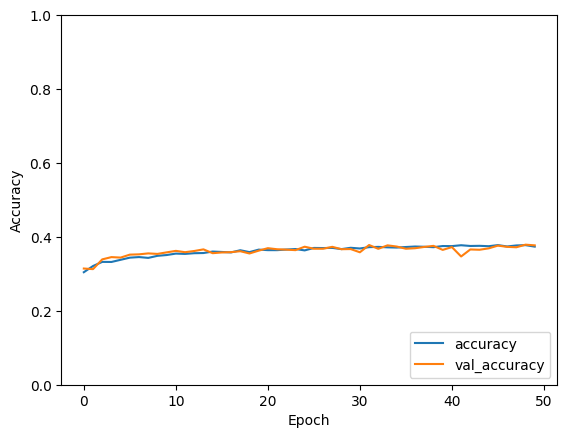

In [64]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=(7, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.2)
model.summary()

print("Accuracy", model.evaluate(X_test, y_test)[1])
print(model.predict(X_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [102]:
X_train = X_train.reshape(43200, 7)
X_test = X_test.reshape(14400, 7)

In [106]:
X_train

array([[2.95751860e-04, 9.83027475e-01, 9.30336748e-01, ...,
        3.93531883e-03, 9.98708830e-01, 1.86217299e-01],
       [2.38713052e-12, 9.33821355e-09, 3.81596480e-10, ...,
        9.10920603e-22, 3.56342945e-18, 8.50637120e-30],
       [3.07248481e-08, 1.79771403e-02, 3.17984749e-04, ...,
        9.77314112e-12, 5.82292092e-06, 1.78909408e-13],
       ...,
       [2.85756809e-03, 1.30640545e-02, 1.12729586e-04, ...,
        3.23091939e-07, 1.49236564e-06, 4.27676391e-09],
       [1.00000000e+00, 9.92426312e-01, 5.76852590e-02, ...,
        1.00000000e+00, 8.89154624e-01, 1.00000000e+00],
       [4.54765169e-04, 5.57571571e-01, 3.94062939e-03, ...,
        1.79996610e-06, 4.96110048e-03, 2.26841087e-06]])

In [127]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [138]:
X_train.drop('four', axis=1, inplace=True)
X_train.drop('five', axis=1, inplace=True)
X_train.drop('six', axis=1, inplace=True)
X_train.drop('seven', axis=1, inplace=True)

X_test.drop('four', axis=1, inplace=True)
X_test.drop('five', axis=1, inplace=True)
X_test.drop('six', axis=1, inplace=True)
X_test.drop('seven', axis=1, inplace=True)

Epoch 1/10


1350/1350 [==============================] - 4s 2ms/step - loss: 1.3664 - accuracy: 0.3140
Epoch 2/10
1350/1350 [==============================] - 3s 2ms/step - loss: 1.3259 - accuracy: 0.3587
Epoch 3/10
1350/1350 [==============================] - 3s 2ms/step - loss: 1.3151 - accuracy: 0.3682
Epoch 4/10
1350/1350 [==============================] - 3s 2ms/step - loss: 1.3088 - accuracy: 0.3709
Epoch 5/10
1350/1350 [==============================] - 3s 2ms/step - loss: 1.3045 - accuracy: 0.3795
Epoch 6/10
1350/1350 [==============================] - 3s 2ms/step - loss: 1.3011 - accuracy: 0.3809
Epoch 7/10
1350/1350 [==============================] - 3s 2ms/step - loss: 1.2990 - accuracy: 0.3829
Epoch 8/10
1350/1350 [==============================] - 3s 2ms/step - loss: 1.2976 - accuracy: 0.3851
Epoch 9/10
1350/1350 [==============================] - 3s 2ms/step - loss: 1.2960 - accuracy: 0.3872
Epoch 10/10
1350/1350 [==============================] - 3s 2ms/step - loss: 1.2952 - accurac

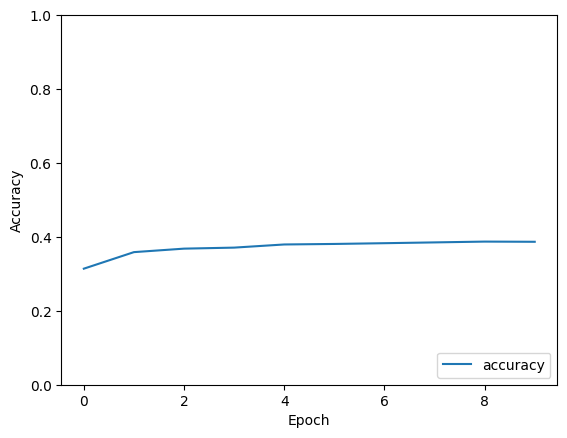

In [141]:
from keras.layers import SimpleRNN, LSTM
#Shuffle the data
"""X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)"""

model = Sequential()
model.add(Input(shape=(3, 1)))
model.add(LSTM(128, return_sequences=False, activation='relu'))
#model.add(LSTM(32))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))


model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32)
model.summary()

print("Accuracy", model.evaluate(X_test, y_test))
print(model.predict(X_test))
print(y_test)

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()